# Analis Electricity Data

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def load_csv(data_path):
    data_path = os.path.join(data_folder_path, file_name)
    # date_columns = ['date']
    
    # Load CSV file
    df = pd.read_csv(data_path)
    # df = pd.read_csv(data_path, parse_dates=date_columns, dayfirst=True)
    # df = pd.read_csv(data_path, parse_dates=date_columns, dayfirst=True, date_format=date_format)
    df['date_time'] = pd.to_datetime(df['date'] + ' ' + df['beat_start_time'], dayfirst=True)
    return df

def show_plot(df):
    original_consumption = 'consumption_kWh'
    date_time_column = 'date_time'
    
    # Calculate Const discounted usage (7% discount)
    const_discount = 7
    const_discount_consumption = 'const_discount_consumption_kWh'
    df[const_discount_consumption] = df[original_consumption] * (100-const_discount)/100  # Applying 7% discount

    # Apply discount of 15% for usage between 14:00 and 20:00
    peak_hours_discount = 15
    peak_hours_discount_consumption = 'peak_hours_discount_consumption_kWh' 
    df[peak_hours_discount_consumption] = df[original_consumption]
    mask = (df[date_time_column].dt.hour >= 14) & (df[date_time_column].dt.hour < 20)
    df.loc[mask, peak_hours_discount_consumption] *= (100-peak_hours_discount)/100  # Applying 15% discount

    # print(df[[original_consumption, const_discount_consumption, peak_hours_discount_consumption]].sum())

    # Extract month and year from the date_time_column column
    df['year_month'] = df[date_time_column].dt.to_period('M')

    # Aggregate usage by month
    monthly_usage = df.groupby('year_month')[[original_consumption, const_discount_consumption, peak_hours_discount_consumption]].sum().reset_index()

    # Convert 'year_month' back to datetime for plotting
    monthly_usage['year_month'] = monthly_usage['year_month'].dt.to_timestamp()

    # Plot the data using Seaborn
    plt.figure(figsize=(12, 6))

    # Plot original usage
    sns.lineplot(data=monthly_usage, x='year_month', y=original_consumption, marker='o', label='Original Usage')

    # Plot const discounted usage
    sns.lineplot(data=monthly_usage, x='year_month', y=const_discount_consumption, marker='o', label=f'{const_discount}%  Const Discounted Usage')

    # Plot peak hours discounted usage
    sns.lineplot(data=monthly_usage, x='year_month', y=peak_hours_discount_consumption, marker='o', label=f'{peak_hours_discount}% Peak Hours Discounted Usage (14:00-20:00)')

    # Customize the plot
    plt.title('Monthly Usage')
    plt.xlabel('Month')
    plt.ylabel('Usage')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.legend()

    # Show the plot
    plt.tight_layout()
    plt.show()


## Show Usage Per Month

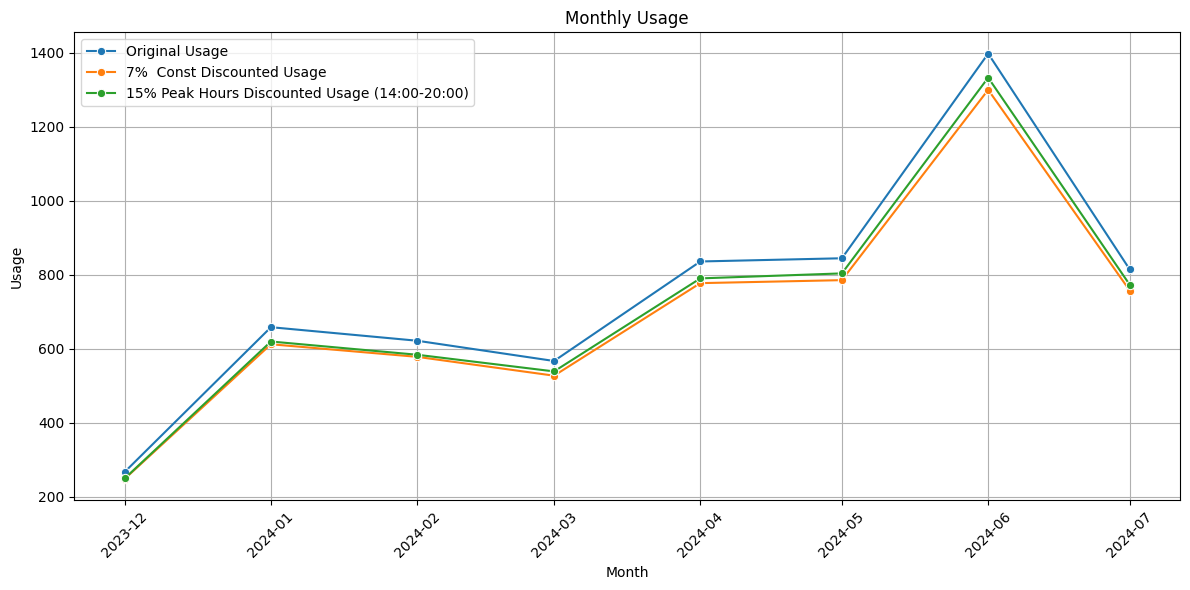

In [28]:
import os

data_folder_path = '/Users/yoavhagashi/Project/Electricity_reform/data'
file_name = 'meter_23209887_LP_18-07-2024.csv'    

data_path = os.path.join(data_folder_path, file_name)
# Load CSV file
df = load_csv(data_path)

show_plot(df)
